In [1]:
#load required libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import difflib as dfl
print(os.listdir("../optum_data_science_project"))
#Importing the dataset: data and label
df=pd.read_csv('data.csv',encoding='latin1',engine='python')
label=pd.read_csv('labels.csv',delimiter=',')

['EDA.ipynb', 'labels.csv', '.DS_Store', 'Project_Instructions.pdf', 'data.csv', '.ipynb_checkpoints']


In [2]:
df.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000,3/14/11,Roman,1390.0,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0,3/6/13,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25,2/25/13,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0,1/28/13,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0,7/13/11,Action In A,0.0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
pd.factorize(label['status_group']) #it seems nonfunctional is just a type so change it to non func
np.where(label['status_group']=='nonfunctional')
label['status_group'][3450]='non functional'
pd.factorize(label['status_group']) ## 3 classes

(array([0, 0, 0, ..., 0, 0, 0]),
 Index(['functional', 'non functional', 'functional needs repair'], dtype='object'))

In [4]:
df.shape # shape of data

(59401, 40)

In [5]:
#check if id is missing!
df.id.isnull().sum()

0

In [6]:
#Quick descriptive statistics to see how many uniques values are in each feature
df.describe(include='all')

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59401.000000,59401,59401,55766,59400.000000,55746,59401.000000,5.940100e+04,59401,59401.000000,...,59401,59401,59401,59401,59401,59401,59401,59401,59401,59401
unique,NaN,99,356,1897,NaN,2145,NaN,NaN,37400,NaN,...,8,8,6,5,5,10,8,3,7,6
top,NaN,0,3/15/11,Government Of Tanzania,NaN,DWE,NaN,NaN,none,NaN,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,NaN,41639,572,9084,NaN,17402,NaN,NaN,3563,NaN,...,25347,50819,50819,33186,33186,17022,17022,45795,28523,34626
mean,37115.697379,NaN,NaN,NaN,668.304949,NaN,34.077438,-5.706125e+00,NaN,0.474133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,21453.390691,NaN,NaN,NaN,693.111463,NaN,6.567377,2.946079e+00,NaN,12.236127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,-90.000000,NaN,0.000000,-1.164944e+01,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,18520.000000,NaN,NaN,NaN,0.000000,NaN,33.090347,-8.541109e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37062.000000,NaN,NaN,NaN,369.000000,NaN,34.908668,-5.021698e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,55658.000000,NaN,NaN,NaN,1319.250000,NaN,37.178350,-3.326164e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#See what type of features are there
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59401 entries, 0 to 59400
Data columns (total 40 columns):
id                       59401 non-null int64
amount_tsh               59401 non-null object
date_recorded            59401 non-null object
funder                   55766 non-null object
gps_height               59400 non-null float64
installer                55746 non-null object
longitude                59401 non-null float64
latitude                 59401 non-null float64
wpt_name                 59401 non-null object
num_private              59401 non-null int64
basin                    59401 non-null object
subvillage               59030 non-null object
region                   59401 non-null object
region_code              59401 non-null int64
district_code            59401 non-null int64
lga                      59401 non-null object
ward                     59401 non-null object
population               59401 non-null int64
public_meeting           56066 non-null object


In [8]:
#Find Nan values
#pd.isnull(df).sum()#/df.shape[0]
#Use simple intrerpolation to impute features with few missing values
df=df.interpolate()
pd.isnull(df).sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3335
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [9]:
#Drop Scheme_name as it 45% of data is missing
df = df.drop(columns="scheme_name")
#Drop rows which include missing values 
df=df.dropna(axis=0)
df.shape

(48288, 39)

In [10]:
pd.isnull(df['amount_tsh']).sum()

0

In [11]:
#Double check missing values
#pd.isnull(df1).sum()
#Get info of the dataset whithout missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48288 entries, 0 to 59400
Data columns (total 39 columns):
id                       48288 non-null int64
amount_tsh               48288 non-null object
date_recorded            48288 non-null object
funder                   48288 non-null object
gps_height               48288 non-null float64
installer                48288 non-null object
longitude                48288 non-null float64
latitude                 48288 non-null float64
wpt_name                 48288 non-null object
num_private              48288 non-null int64
basin                    48288 non-null object
subvillage               48288 non-null object
region                   48288 non-null object
region_code              48288 non-null int64
district_code            48288 non-null int64
lga                      48288 non-null object
ward                     48288 non-null object
population               48288 non-null int64
public_meeting           48288 non-null object


In [12]:
#These three functions are taken from https://www.kaggle.com/willkoehrsen/starter-pump-it-up-data-mining-the-57d47f1b-6
#I found it efficent and correct for visulisation for I did not write new code
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [13]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = "Pumpitup"
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [14]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


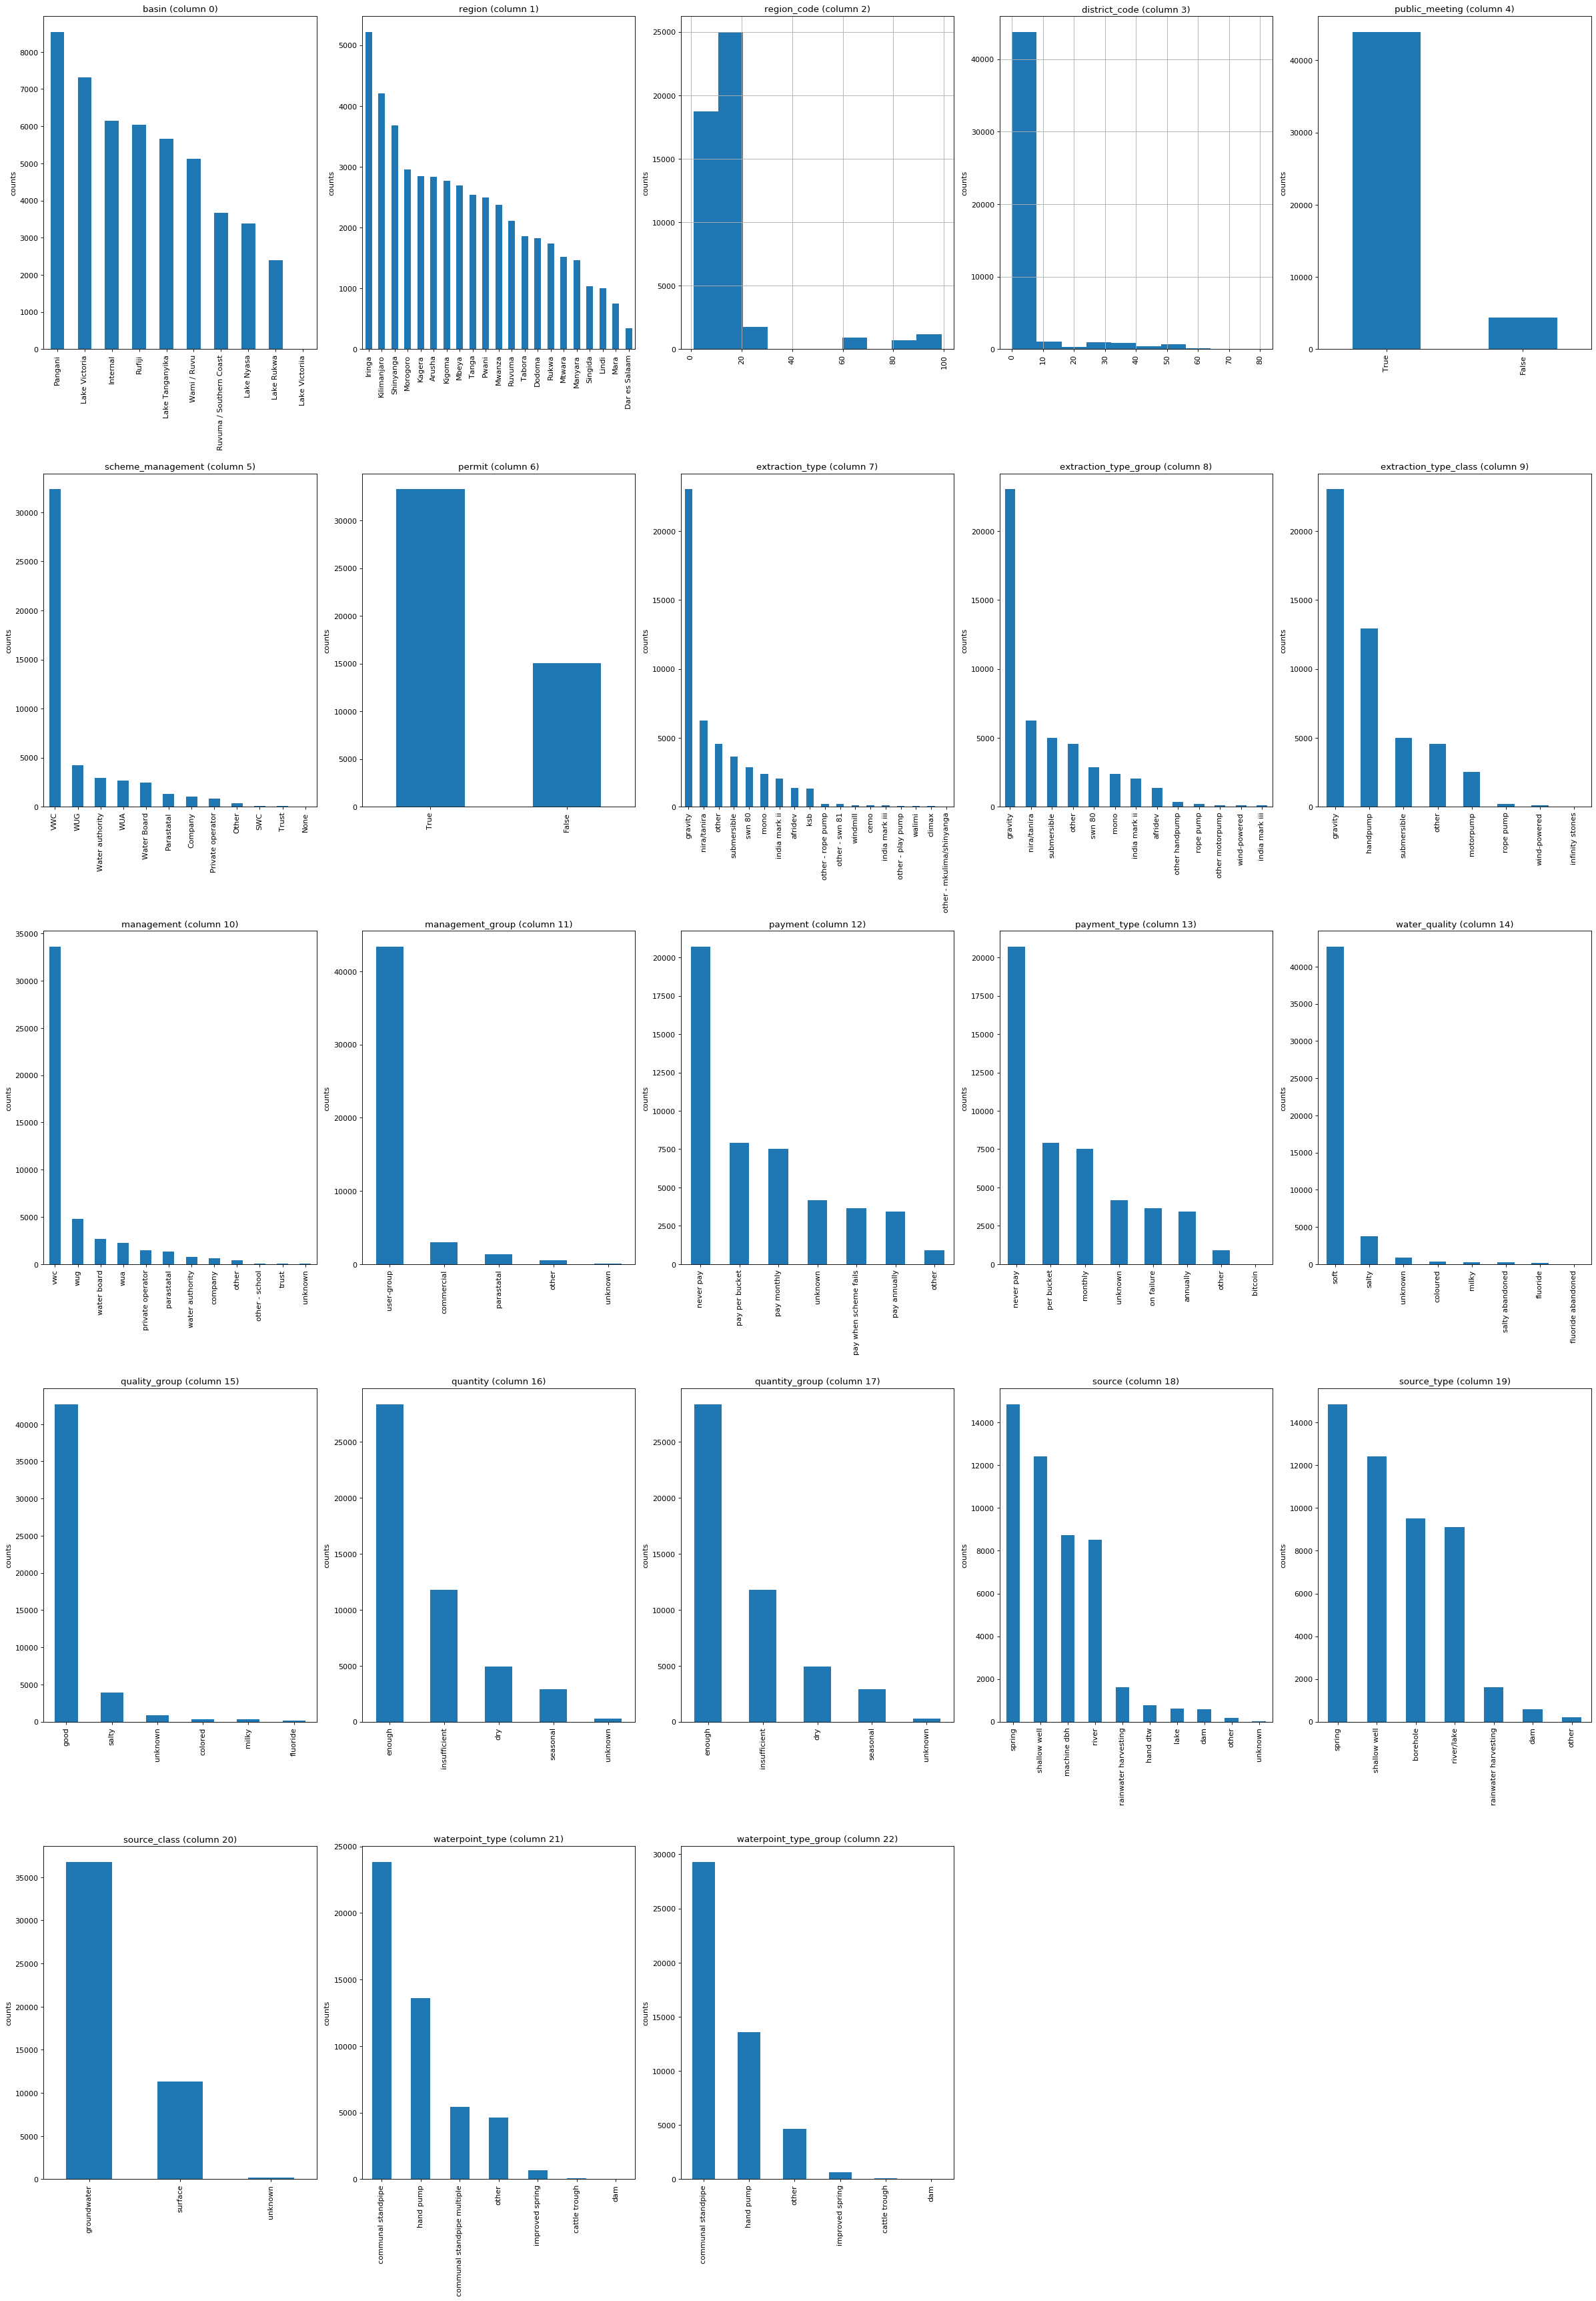

In [15]:
plotPerColumnDistribution(df, 40, 5)#plot only those features with no more than 50 unique values

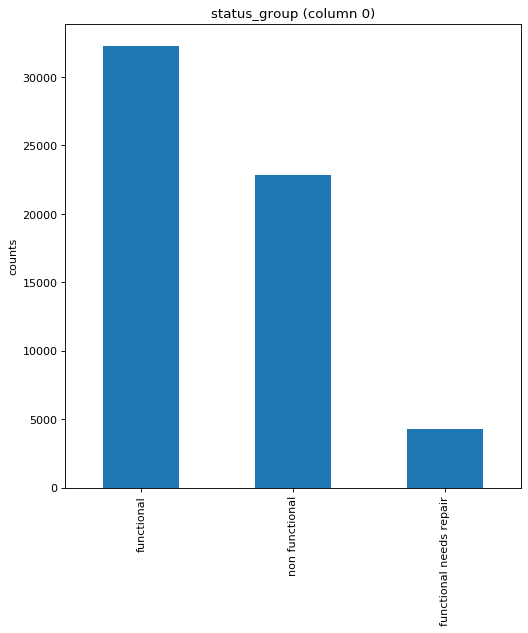

In [16]:
plotPerColumnDistribution(label, 10, 5)
#plotScatterMatrix(df1, 20, 10)

In [ ]:
#Looking at the figures above one can see there are some redundant categories in some features and some values such as victoria
# has spelled wrong- minor! there are some dominant categories in some features which makes one think that the data might be imbalance!
#from statistical point of view many of these features are skewed so bear in mind most of these features are categorical and they are ordinal as such

In [19]:
#Total static head: convert amount_tsh type to float
df.amount_tsh=pd.to_numeric(df.amount_tsh, errors='coerce')
df.amount_tsh=df.amount_tsh.interpolate()
#convert date to proper datetime formaty 
df.date_recorded=pd.to_datetime(df.date_recorded)#.dt.strftime('%m/%d/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48288 entries, 0 to 59400
Data columns (total 39 columns):
id                       48288 non-null int64
amount_tsh               48288 non-null float64
date_recorded            48288 non-null datetime64[ns]
funder                   48288 non-null object
gps_height               48288 non-null float64
installer                48288 non-null object
longitude                48288 non-null float64
latitude                 48288 non-null float64
wpt_name                 48288 non-null object
num_private              48288 non-null int64
basin                    48288 non-null object
subvillage               48288 non-null object
region                   48288 non-null object
region_code              48288 non-null int64
district_code            48288 non-null int64
lga                      48288 non-null object
ward                     48288 non-null object
population               48288 non-null int64
public_meeting           48288 non-nul

In [20]:
#As can be seen from the figures aboves some of the variables carrying the same information, some duplicates and some only have one unique values
#which need to be addressed: This part could be done after computing the corr matrix as well!
#lets select categorical variables
df2=df.select_dtypes(include='object')
#lets convert strings to lower case and look for duplicates
df2=df2.apply(lambda x: x.astype(str).str.lower())
#Quick corr plot for cats just to get an idea
df2.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

#Based on firts figure and number of unique values I am going to check the following vriables: extraction_type_class and extraction_type_group
uniques1,uniques = pd.factorize(df2['management'])[1],pd.factorize(df2['management_group'])[1]
print(uniques1,uniques)
df2[df2['management_group'].str.contains('unknown', regex=False)]['management'].unique()#management is a sub_class of management_type so keep managment

#quantity_group and quantity are repeated:
(df2['quantity_group'].str.lower().str.replace('s/+',"") == df2['quantity'].str.lower().str.replace('s/+',"")).sum()
#payment-type contains more info than payment: 
uniques1,uniques = pd.factorize(df2['payment'])[1],pd.factorize(df2['payment_type'])[1]
print(uniques1,uniques)
#keep only water_quality
uniques1,uniques = pd.factorize(df2['water_quality'])[1],pd.factorize(df2['quality_group'])[1]
print(uniques1,uniques)
df2[df2['quality_group'].str.contains('good', regex=False)]['water_quality'].unique()
#keep source as it contains more info 
uniques1,uniques = pd.factorize(df2['source'])[1],pd.factorize(df2['source_type'])[1]
print(uniques1,uniques)
df2[df2['source_type'].str.contains('lake', regex=False)]['source'].unique()
#keep only waterpoint_type
uniques1,uniques = pd.factorize(df2['waterpoint_type'])[1],pd.factorize(df2['waterpoint_type_group'])[1]
print(uniques1,uniques)

Index(['vwc', 'private operator', 'wug', 'water board', 'wua', 'company',
       'other', 'water authority', 'parastatal', 'other - school', 'unknown',
       'trust'],
      dtype='object') Index(['user-group', 'commercial', 'other', 'parastatal', 'unknown'], dtype='object')
Index(['pay annually', 'pay per bucket', 'never pay', 'pay when scheme fails',
       'other', 'pay monthly', 'unknown'],
      dtype='object') Index(['annually', 'per bucket', 'never pay', 'on failure', 'other', 'monthly',
       'unknown', 'bitcoin'],
      dtype='object')
Index(['soft', 'salty', 'unknown', 'milky', 'fluoride', 'coloured',
       'salty abandoned', 'fluoride abandoned'],
      dtype='object') Index(['good', 'salty', 'unknown', 'milky', 'fluoride', 'colored'], dtype='object')
Index(['spring', 'dam', 'machine dbh', 'other', 'shallow well', 'river',
       'hand dtw', 'rainwater harvesting', 'lake', 'unknown'],
      dtype='object') Index(['spring', 'dam', 'borehole', 'other', 'shallow well', 'rive

In [21]:
#drop duplicate features
df1=df.drop(columns=['waterpoint_type_group','source','quality_group','payment','recorded_by','management_group','quantity_group'])
df1


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,extraction_type,extraction_type_group,extraction_type_class,management,payment_type,water_quality,quantity,source_type,source_class,waterpoint_type
0,69572,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,0,...,gravity,gravity,gravity,vwc,annually,soft,enough,spring,groundwater,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,gravity,gravity,gravity,vwc,per bucket,soft,enough,dam,surface,communal standpipe multiple
3,67743,0.0,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,submersible,submersible,submersible,vwc,never pay,soft,dry,borehole,groundwater,communal standpipe multiple
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0.0,DWE,39.172796,-4.765587,Tajiri,0,...,submersible,submersible,submersible,vwc,per bucket,salty,enough,other,unknown,communal standpipe multiple
6,19816,0.0,2012-10-01,Dwsp,0.0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,swn 80,swn 80,handpump,vwc,never pay,soft,enough,borehole,groundwater,hand pump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,11164,500.0,2011-03-09,World Bank,351.0,ML appro,37.634053,-6.124830,Chimeredya,0,...,submersible,submersible,submersible,vwc,monthly,soft,enough,borehole,groundwater,communal standpipe
59396,60739,10.0,2013-05-03,Germany Republi,1210.0,CES,37.169807,-3.253847,Area Three Namba 27,0,...,gravity,gravity,gravity,water board,per bucket,soft,enough,spring,groundwater,communal standpipe
59397,27263,4700.0,2011-05-07,Cefa-njombe,1212.0,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,gravity,gravity,gravity,vwc,annually,soft,enough,river/lake,surface,communal standpipe
59399,31282,0.0,2011-03-08,Malec,0.0,Musa,35.861315,-6.378573,Mshoro,0,...,nira/tanira,nira/tanira,handpump,vwc,never pay,soft,insufficient,shallow well,groundwater,hand pump


In [22]:
#join target with the data: 
#Problem: ID column types do not match in data and label so I converted them to float in df and label in order to merge them
df1.id=df1.id.astype(float)
label.id=pd.to_numeric(label.id, errors='coerce')
df1=pd.merge(df1, label, left_on='id', right_on='id')
df1.rename(columns={'status_group':'Target'}, inplace=True)
df1

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,extraction_type_group,extraction_type_class,management,payment_type,water_quality,quantity,source_type,source_class,waterpoint_type,Target
0,69572.0,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,0,...,gravity,gravity,vwc,annually,soft,enough,spring,groundwater,communal standpipe,functional
1,34310.0,25.0,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,gravity,gravity,vwc,per bucket,soft,enough,dam,surface,communal standpipe multiple,functional
2,67743.0,0.0,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,submersible,submersible,vwc,never pay,soft,dry,borehole,groundwater,communal standpipe multiple,non functional
3,9944.0,20.0,2011-03-13,Mkinga Distric Coun,0.0,DWE,39.172796,-4.765587,Tajiri,0,...,submersible,submersible,vwc,per bucket,salty,enough,other,unknown,communal standpipe multiple,functional
4,19816.0,0.0,2012-10-01,Dwsp,0.0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,swn 80,handpump,vwc,never pay,soft,enough,borehole,groundwater,hand pump,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48282,11164.0,500.0,2011-03-09,World Bank,351.0,ML appro,37.634053,-6.124830,Chimeredya,0,...,submersible,submersible,vwc,monthly,soft,enough,borehole,groundwater,communal standpipe,non functional
48283,60739.0,10.0,2013-05-03,Germany Republi,1210.0,CES,37.169807,-3.253847,Area Three Namba 27,0,...,gravity,gravity,water board,per bucket,soft,enough,spring,groundwater,communal standpipe,functional
48284,27263.0,4700.0,2011-05-07,Cefa-njombe,1212.0,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,gravity,gravity,vwc,annually,soft,enough,river/lake,surface,communal standpipe,functional
48285,31282.0,0.0,2011-03-08,Malec,0.0,Musa,35.861315,-6.378573,Mshoro,0,...,nira/tanira,handpump,vwc,never pay,soft,insufficient,shallow well,groundwater,hand pump,functional


In [24]:
#Split features to numeric and cats and plot corr matrix
numeric_feature = df1._get_numeric_data().columns
df_col_names = df1.columns.tolist()
categorical_feature_name  = [i for i in df_col_names if i not in numeric_feature]
categorical_feature_name.remove('date_recorded')

In [25]:
#correlation among numerical features
df1[numeric_feature].corr()# no significant correlation between num features: construction_year and gps shows 65% correlation

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,1.000000,-0.007577,-0.007713,-0.004820,0.004156,-0.002506,-0.003298,-0.004683,-0.005034,-0.005868
amount_tsh,-0.007577,1.000000,0.089279,0.022986,-0.069826,0.002042,-0.031755,-0.035379,0.015779,0.078807
gps_height,-0.007713,0.089279,1.000000,0.142949,-0.116647,0.005783,-0.189441,-0.173965,0.112392,0.648130
longitude,-0.004820,0.022986,0.142949,1.000000,-0.413741,0.026134,0.016733,0.140961,0.074178,0.401175
latitude,0.004156,-0.069826,-0.116647,-0.413741,1.000000,0.010414,-0.243389,-0.184215,-0.050231,-0.303329
num_private,-0.002506,0.002042,0.005783,0.026134,0.010414,1.000000,-0.024751,-0.007113,0.005006,0.026756
region_code,-0.003298,-0.031755,-0.189441,0.016733,-0.243389,-0.024751,1.000000,0.706633,0.085280,0.015937
district_code,-0.004683,-0.035379,-0.173965,0.140961,-0.184215,-0.007113,0.706633,1.000000,0.068140,0.060503
population,-0.005034,0.015779,0.112392,0.074178,-0.050231,0.005006,0.085280,0.068140,1.000000,0.245447
construction_year,-0.005868,0.078807,0.648130,0.401175,-0.303329,0.026756,0.015937,0.060503,0.245447,1.000000


In [ ]:
plotCorrelationMatrix(df1[numeric_feature], 40)

In [27]:
corr_matrix = df1[categorical_feature_name].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1).abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
[column for column in upper.columns if any(upper[column] > 0.75)]

['extraction_type_group']

In [26]:
#correlation among cat features
df1[categorical_feature_name].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
#  extraction_type_class and extraction_type_group show highly correlated so drop one
#categorical_feature_name.remove('extraction_type_group')
df1[categorical_feature_name].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
# 'extraction_type_class', 'management' correlation above 75% so delete them for now
categorical_feature_name.remove('extraction_type_class')
categorical_feature_name.remove('management')
df1[categorical_feature_name].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)


,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,scheme_management,permit,extraction_type,extraction_type_group,payment_type,water_quality,quantity,source_type,source_class,waterpoint_type,Target
funder,1.000000,0.543883,0.028333,0.036070,0.039448,0.041071,0.116873,0.110000,0.017484,0.034283,-0.002022,0.036854,0.036437,-0.003480,0.033391,0.026341,0.056789,0.011455,0.045789,-0.040366
installer,0.543883,1.000000,0.031562,0.023216,0.033756,0.048389,0.138974,0.126876,0.024844,0.043320,0.024789,0.054412,0.048561,-0.031962,0.029468,0.042323,0.057170,0.025829,0.038458,-0.024293
wpt_name,0.028333,0.031562,1.000000,0.014113,0.279957,0.118020,0.007933,0.017577,0.009337,0.017743,0.036564,0.021965,0.019492,0.032944,-0.006575,0.007158,0.029083,0.014070,0.043968,0.012296
basin,0.036070,0.023216,0.014113,1.000000,0.074216,0.289127,0.249425,0.057857,0.024867,-0.057234,0.000191,0.218229,0.221847,-0.059876,0.052724,-0.065340,0.287753,0.048368,0.247393,0.073090
subvillage,0.039448,0.033756,0.279957,0.074216,1.000000,0.034253,0.048654,0.139707,0.019574,-0.024443,-0.025000,0.042402,0.051533,-0.021793,0.013737,-0.014754,0.017834,-0.047941,0.111924,0.008240
region,0.041071,0.048389,0.118020,0.289127,0.034253,1.000000,0.266344,0.081463,-0.028085,-0.073384,0.133732,0.078922,0.085202,0.063931,0.042493,0.112911,0.121580,0.029326,0.102061,0.089955
lga,0.116873,0.138974,0.007933,0.249425,0.048654,0.266344,1.000000,0.250613,0.104974,-0.119057,0.010404,0.208630,0.222194,-0.180564,0.091911,0.024222,0.155686,-0.018955,0.150323,0.072606
ward,0.110000,0.126876,0.017577,0.057857,0.139707,0.081463,0.250613,1.000000,0.037818,-0.073530,-0.019160,0.135778,0.144389,-0.077488,0.051349,0.022269,0.019664,-0.060479,0.132192,0.053993
public_meeting,0.017484,0.024844,0.009337,0.024867,0.019574,-0.028085,0.104974,0.037818,1.000000,0.093870,-0.148935,0.082230,0.062479,-0.033391,0.028128,0.024527,0.090519,0.050990,0.095418,0.076092
scheme_management,0.034283,0.043320,0.017743,-0.057234,-0.024443,-0.073384,-0.119057,-0.073530,0.093870,1.000000,0.067135,-0.063043,-0.093155,0.121915,-0.046098,0.003892,0.120097,0.220418,-0.135865,-0.014728


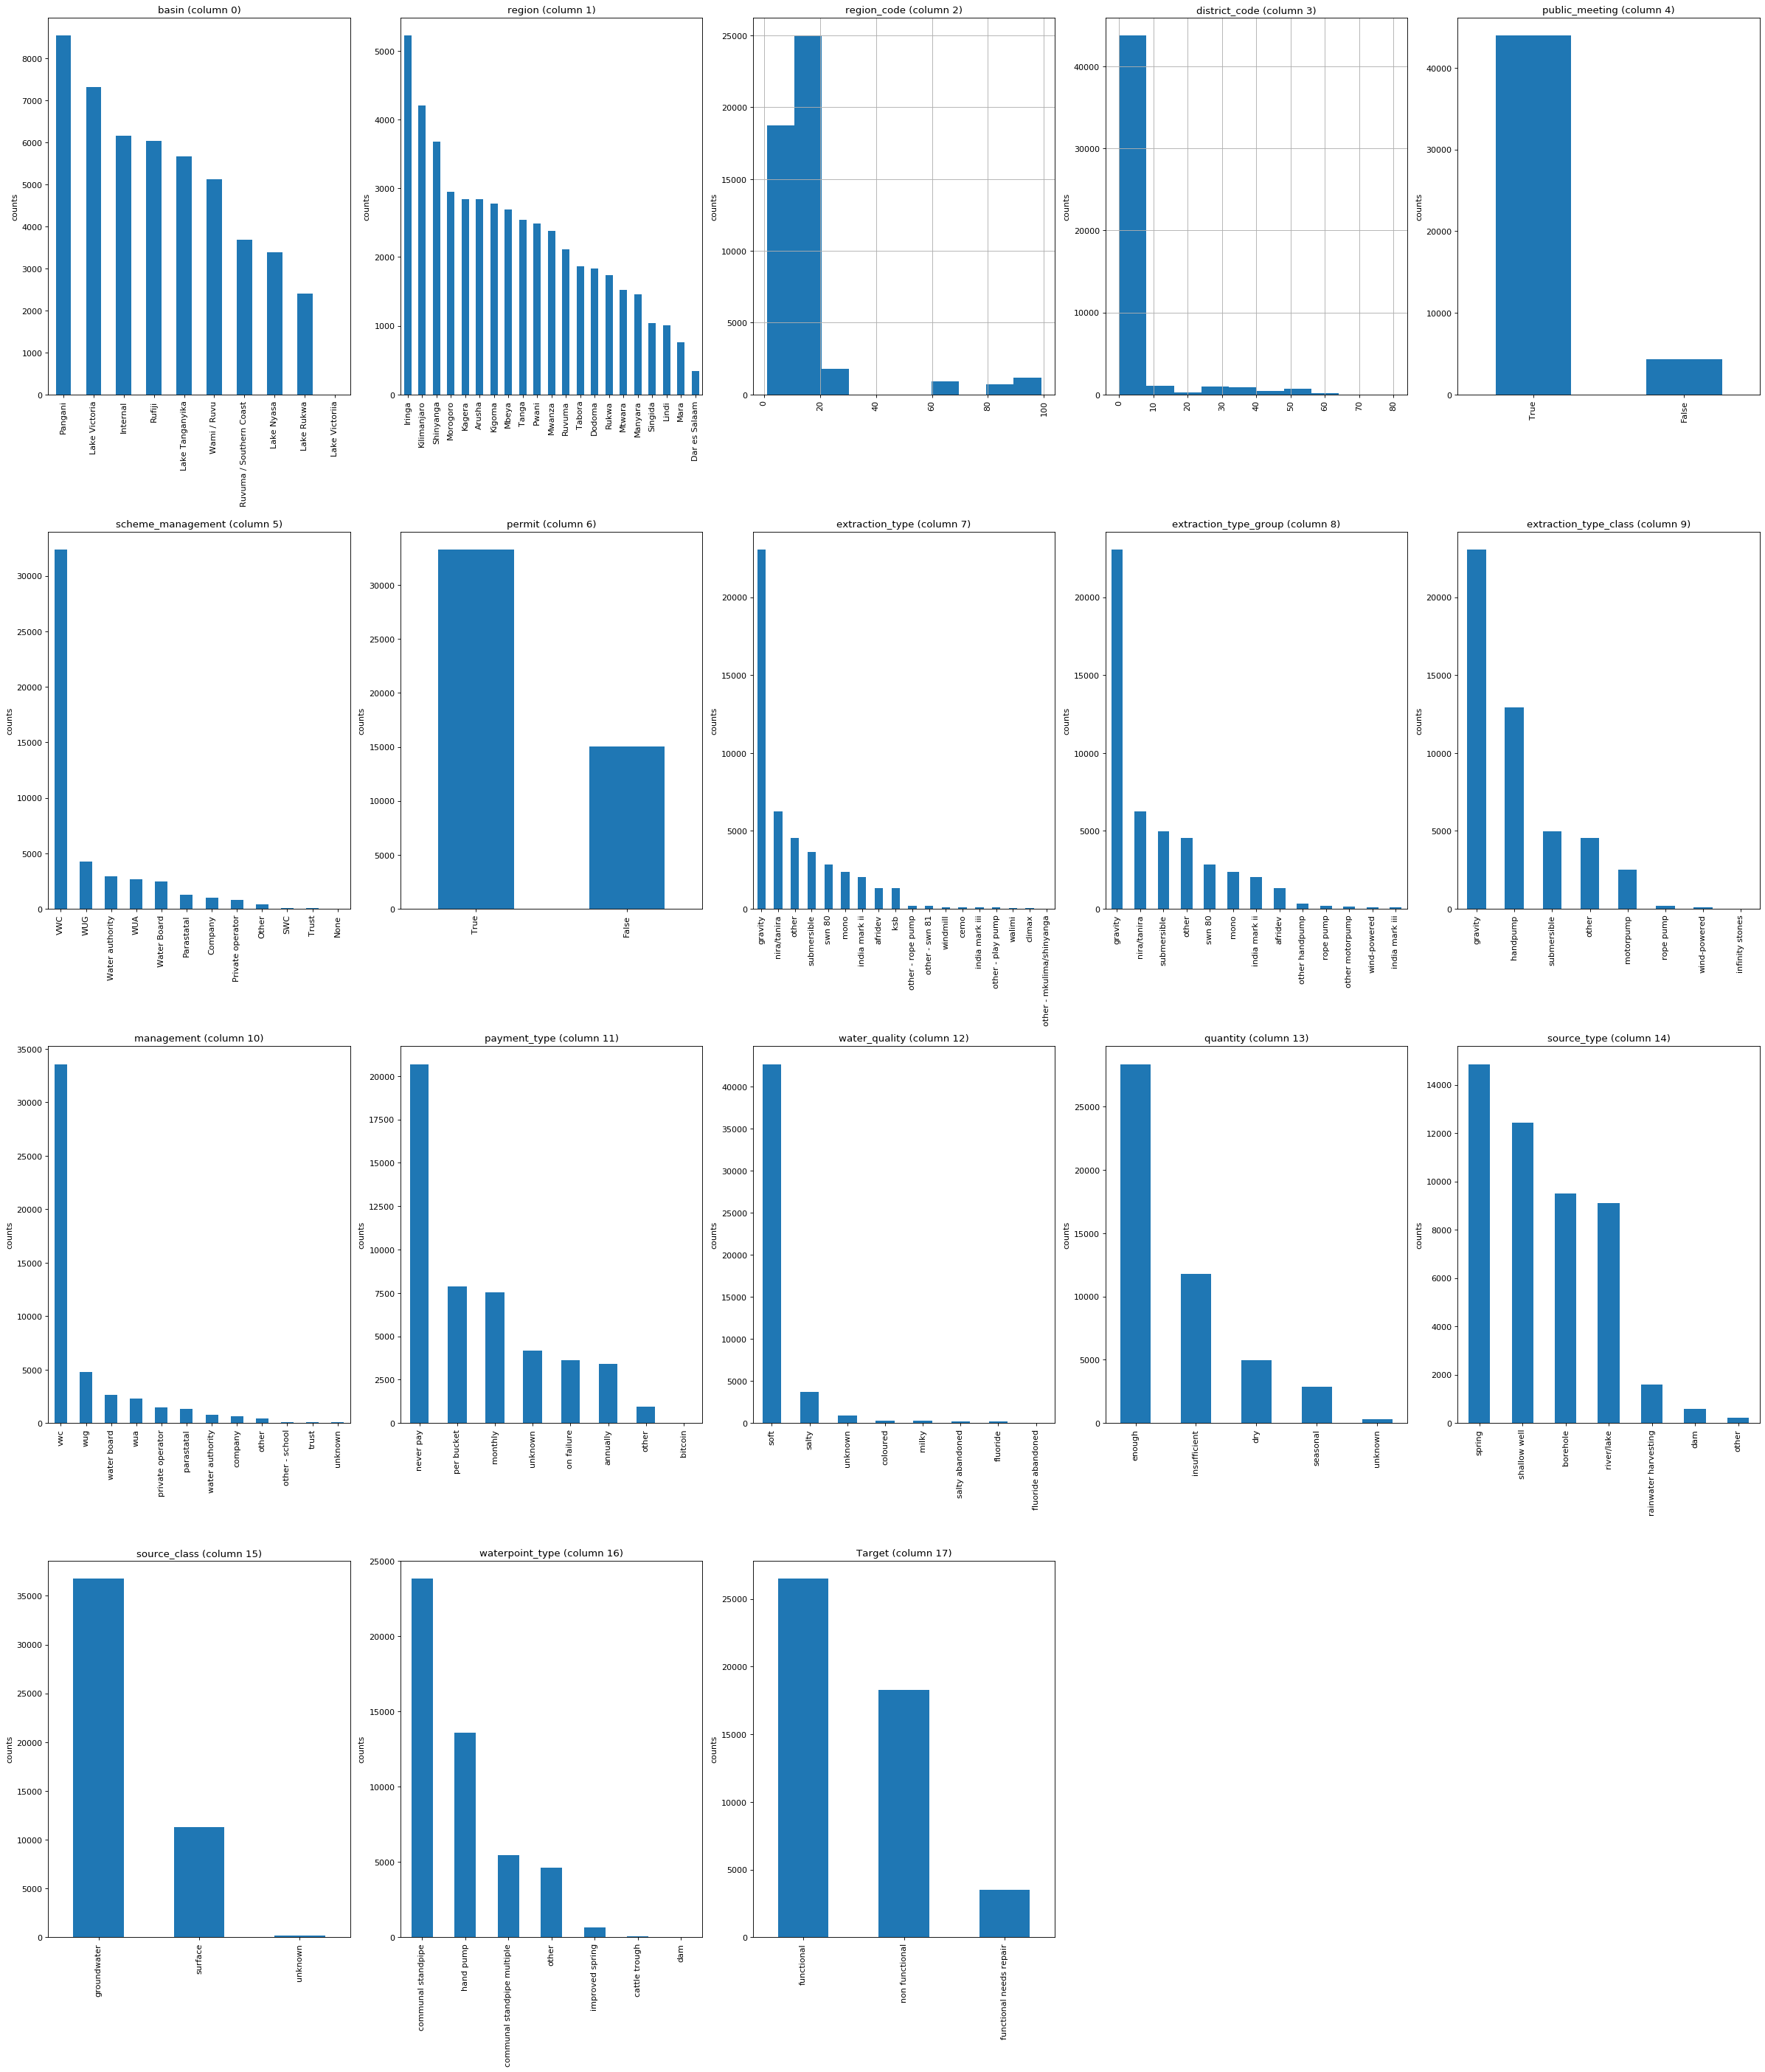

In [28]:
plotPerColumnDistribution(df1, 40, 5)

In [40]:
# LabelEncoder to encode cat variable
#I use label encoder for larger categories and ordinal ones such as quantity and quality group hot-encoding 
#for not orinal with smaller groups and delete the first one to avoid multicolinearity:
###I also tried using only encoder which was slightly worse than using hotencode and encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
# apply "le.fit_transform"
onehot_feat=['public_meeting','scheme_management','extraction_type_group','payment_type','management','source_type','waterpoint_type']
encod_feat  = [i for i in categorical_feature_name if i not in onehot_feat]
df1_encoded = df1[encod_feat].apply(le.fit_transform)
df2=pd.get_dummies(df1[onehot_feat],drop_first=True)
#df2.nunique()
dff=df1_encoded.join(df2)
dff=dff.join(df1[numeric_feature])

In [41]:
#Drop ID and Target variable
X = dff.drop(columns=['id','Target']) #78 features and 48287 customers
Y = dff['Target']
# split data into train and test datasets: 30% left for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [42]:
# Feature Scaling: It is better to using standard scaling before training the model:
### Logistic regression does not converge without feature scaling for this data!
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sc = StandardScaler() #MinMaxScaler(feature_range = (0, 1))
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.40326567, -0.07496635,  0.71094543, ..., -0.49130734,
        -0.26627044,  0.71121834],
       [-0.25855238,  0.19942373,  1.13536151, ..., -0.49130734,
         0.04650082,  0.71441562],
       [-0.66123285, -0.32212688,  0.73967513, ..., -0.38788388,
        -0.37052753, -1.42776139],
       ...,
       [-1.42674522, -1.2018508 ,  1.09266877, ...,  0.12923343,
         0.29671783,  0.70588954],
       [ 0.47550058, -0.64469232,  0.804769  , ..., -0.38788388,
        -0.37052753, -1.42776139],
       [ 0.60553281,  1.43103722,  1.13536151, ...,  0.23265689,
        -0.37052753, -1.42776139]])

In [43]:
#Logistic regression: First model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'saga', multi_class='auto',max_iter=10000,penalty='elasticnet',l1_ratio=0.2)
model.fit(X_train,y_train)
# use the model to make predictions with the test data
y_pred = model.predict(X_test)
from sklearn import metrics
from sklearn.metrics import confusion_matrix, matthews_corrcoef, f1_score, classification_report
count_misclassified = (y_test != y_pred).sum()
###Print the metrics: such as F1 score, Precision, confusion matrix and matthew coefficent
print('Misclassified: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred, average='micro')))
print('MCC:{:.2f}'.format(matthews_corrcoef(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['functional','needs repair','non functional']))
#Not so good:  logist regression  does not seem to fit the data well

Misclassified: 4425
Accuracy: 0.69
F1 Score: 0.69
MCC:0.41
[[6882   39 1025]
 [ 808   67  200]
 [2322   31 3113]]
                precision    recall  f1-score   support

    functional       0.69      0.87      0.77      7946
  needs repair       0.49      0.06      0.11      1075
non functional       0.72      0.57      0.64      5466

      accuracy                           0.69     14487
     macro avg       0.63      0.50      0.50     14487
  weighted avg       0.68      0.69      0.67     14487



In [44]:
#KNN: with min 5 neighbours and metric manhatatn
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified: {}'.format(count_misclassified))
print('Accuracy: {:.2f}'.format(accuracy))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred, average='micro')))
print('MCC:{:.2f}'.format(matthews_corrcoef(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['functional','needs repair','non functional']))
#F1 score and precision improved compared to logistic model

Misclassified: 3468
Accuracy: 0.69
F1 Score: 0.76
MCC:0.55
[[6929  217  800]
 [ 599  317  159]
 [1567  126 3773]]
                precision    recall  f1-score   support

    functional       0.76      0.87      0.81      7946
  needs repair       0.48      0.29      0.37      1075
non functional       0.80      0.69      0.74      5466

      accuracy                           0.76     14487
     macro avg       0.68      0.62      0.64     14487
  weighted avg       0.75      0.76      0.75     14487



In [45]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', gamma='auto', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified: {}'.format(count_misclassified))
print('Accuracy: {:.2f}'.format(accuracy))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred, average='micro')))
print('MCC:{:.2f}'.format(matthews_corrcoef(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['functional','needs repair','non functional']))
#Not much gain compared to KNN

Misclassified: 3531
Accuracy: 0.69
F1 Score: 0.76
MCC:0.54
[[7292   66  588]
 [ 738  163  174]
 [1915   50 3501]]
                precision    recall  f1-score   support

    functional       0.73      0.92      0.82      7946
  needs repair       0.58      0.15      0.24      1075
non functional       0.82      0.64      0.72      5466

      accuracy                           0.76     14487
     macro avg       0.71      0.57      0.59     14487
  weighted avg       0.76      0.76      0.74     14487



In [46]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified: {}'.format(count_misclassified))
print('Accuracy: {:.2f}'.format(accuracy))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred, average='micro')))
print('MCC:{:.2f}'.format(matthews_corrcoef(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['functional','needs repair','non functional']))

Misclassified: 3715
Accuracy: 0.69
F1 Score: 0.74
MCC:0.53
[[6282  477 1187]
 [ 500  371  204]
 [1151  196 4119]]
                precision    recall  f1-score   support

    functional       0.79      0.79      0.79      7946
  needs repair       0.36      0.35      0.35      1075
non functional       0.75      0.75      0.75      5466

      accuracy                           0.74     14487
     macro avg       0.63      0.63      0.63     14487
  weighted avg       0.74      0.74      0.74     14487



In [47]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100,  criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred, average='micro')))
print('MCC:{:.2f}'.format(matthews_corrcoef(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['functional','needs repair','non functional']))
##Looks much better: 80% F1 score and 73% Presiion: it seems random forest is a better option!

Misclassified: 2825
Accuracy: 0.80
F1 Score: 0.80
MCC:0.64
[[7102  197  647]
 [ 567  350  158]
 [1173   83 4210]]
                precision    recall  f1-score   support

    functional       0.80      0.89      0.85      7946
  needs repair       0.56      0.33      0.41      1075
non functional       0.84      0.77      0.80      5466

      accuracy                           0.80     14487
     macro avg       0.73      0.66      0.69     14487
  weighted avg       0.80      0.80      0.80     14487



In [50]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv = 10)
print(accuracy)
accuracy.mean()
accuracy.std()

[0.79775281 0.81129843 0.80502959 0.81449704 0.8147929  0.81213018
 0.81627219 0.81651376 0.8108908  0.82154484]


0.006300963692899301

In [51]:
print(accuracy.mean(),accuracy.std())

0.8120722528207963 0.006300963692899301


In [ ]:
###accuracy varies between 79% to 82% in comparison with test accuracy in randomforest: 80%